In [1]:

# ░█████╗░███╗░░██╗░█████╗░██╗░░░░░██╗░░░██╗░██████╗██╗░██████╗
# ██╔══██╗████╗░██║██╔══██╗██║░░░░░╚██╗░██╔╝██╔════╝██║██╔════╝
# ███████║██╔██╗██║███████║██║░░░░░░╚████╔╝░╚█████╗░██║╚█████╗░
# ██╔══██║██║╚████║██╔══██║██║░░░░░░░╚██╔╝░░░╚═══██╗██║░╚═══██╗
# ██║░░██║██║░╚███║██║░░██║███████╗░░░██║░░░██████╔╝██║██████╔╝
# ╚═╝░░╚═╝╚═╝░░╚══╝╚═╝░░╚═╝╚══════╝░░░╚═╝░░░╚═════╝░╚═╝╚═════╝░

# Preámbulo
En este documento se utiliza la base de datos producida en los scripts de procesamiento (disponibles en `/Scripts/1-ProcessingScripts/Delitos Georreferenciados` ) para crear los gráficos solicitados por Daniel en el que se observe la tasa del crimen por cada localidad, organizando las localidades en orden ascendente de acuerdo al estrato promedio.

In [2]:
import pandas as pd 
import shapely.geometry as geom
import geopandas as gpd
from simpledbf import Dbf5
import os
from unidecode import unidecode
import re
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.gridspec as gridspec

# Set locals for directories
working_dir = "/Users/upar/Library/CloudStorage/OneDrive-UniversidaddelosAndes/03 MONEY/CESED/ANDI"
data_dir = "/Users/upar/Library/CloudStorage/OneDrive-UniversidaddelosAndes/03 MONEY/CESED/ANDI/Datos"

# Test directories

os.listdir(working_dir)

['Datos',
 '.DS_Store',
 'Output',
 'UPZs que faltan.pdf',
 'Scripts',
 '.backups',
 'multiproposito.pdf']

In [3]:
# Load database
df=gpd.read_file(f"{data_dir}/3-AnalysisData/delitos_por_upz.gpkg")

In [9]:
df[['2018', '2019', '2020','2021']]

2018    2019    2020    2021
0     33749   35493   37449   38906
1    164233  170643  176206  180217
2     35620   37585   39784   41449
3     16323   16732   17050   17153
4     10027   10455   10807   11006
..      ...     ...     ...     ...
109  111476  115218  118359  120322
110  138657  140077  141266  141451
111   27577   28489   29270   29761
112   39681   40338   40875   41044
113  155423  159120  162089  164019

[114 rows x 4 columns]

In [167]:
# Create a function that eases the process of plotting each crime per year

def plot(dataframe, t_delito:str, s_delito:str, year:str):
    """
    Function to create the required plots.
    """
    
    df = dataframe.copy()
    df=df.sort_values(by='ESTRATO_mean')

    filtro=[i for i in df.columns if f"tasa_{s_delito}" in i]
    M=df.loc[:,filtro].max().max() # Set max for axis limits
    
    fig, ax1 = plt.subplots(figsize=(8, 3))
    ax2 = ax1.twinx()

    ax1.set_title(f"{t_delito} por localidad \n {year}")

    ax1.bar(x=df['CODIGO_UPZ'],height=df[f'tasa_{s_delito}_{year}'], color='grey')
    # ax1.set_xticklabels(df['CODIGO_UPZ'], rotation=90)
    ax1.set_ylabel('Tasa x 100 mil hab.')
    ax2.set_ylim([0,M])
    
    # Plot social stratum
    ax2.set_ylim([0,6])
    ax2.scatter(x=df['CODIGO_UPZ'], y=df['ESTRATO_mean'], color='black')
    ax2.errorbar(x=df['CODIGO_UPZ'],y=df['ESTRATO_mean'], yerr=df['ESTRATO_stddev'],linestyle='', 
             ecolor='#404040', elinewidth=.5)
    ax2.set_ylabel('Estrato promedio')
    [ax2.text(i, j+.3, f'({np.float64(j).round(1)})', fontsize=9, ha='center') for (i, j) in zip(df['CODIGO_UPZ'], df['ESTRATO_mean'])]
    # ax1.text(-1,-250, "Estrato promedio en paréntesis.", fontsize=8)
    return fig

# Eliminando UPZs outliers
Hay UPZs que añaden ruido al análisis dado que son tipos particulares de predios, como por ejemplo:
- la UPZ 117 que es el **AEROPUERTO EL DORADO**
- la UPZ 105 que es el **JARDÍN BOTÁNICO**
- 63 **EL MOCHUELO** que tiene menos de 100 habitantes para todo el período de datos
- 

# 1-Delitos sexuales

In [5]:
### Load necessary strings

n_delito = "1"
s_delito = "delitos_sexuales"
t_delito = "Delitos sexuales"

In [10]:
year=2018
df[f'tasa_{s_delito}_{year}']=np.round(df[f'{s_delito}_{year}']/df[f'{year}']*100000,2)

In [13]:
df.columns

Index(['objectid', 'nombre', 'zona_estaci', 'decreto_pot', 'decreto',
       'shape_area', 'shape_len', 'codigo_id', 'escala_capt', 'fecha_captu',
       'responsable', 'globalid', 'CODIGO_LOCALIDAD', 'NOMBRE_LOCALIDAD',
       'CODIGO_UPZ', 'NOMBRE_UPZ', '2018', '2019', '2020', '2021', '2022',
       '2023', '2024', 'ESTRATO_count', 'ESTRATO_mean', 'ESTRATO_median',
       'ESTRATO_stddev', 'delitos_sexuales_2018', 'homicidios_2018',
       'homicidios_2019', 'homicidios_2020', 'homicidios_2021',
       'violencia_intrafamiliar_2018', 'hurto_a_personas_2018',
       'hurto_a_personas_2019', 'hurto_a_personas_2020',
       'hurto_a_personas_2021', 'hurto_a_residencias_2018',
       'hurto_automotores_2018', 'hurto_automotores_2019',
       'hurto_automotores_2020', 'hurto_automotores_2021',
       'hurto_motocicletas_2018', 'hurto_motocicletas_2019',
       'hurto_motocicletas_2020', 'hurto_motocicletas_2021',
       'hurto_comercios_2018', 'hurto_comercios_2019', 'hurto_comercios_2020

count    1.140000e+02
mean     3.629973e+06
std      1.745343e+06
min      7.396016e+04
25%      2.187954e+06
50%      3.443190e+06
75%      4.574692e+06
max      9.214049e+06
Name: shape_area, dtype: float64

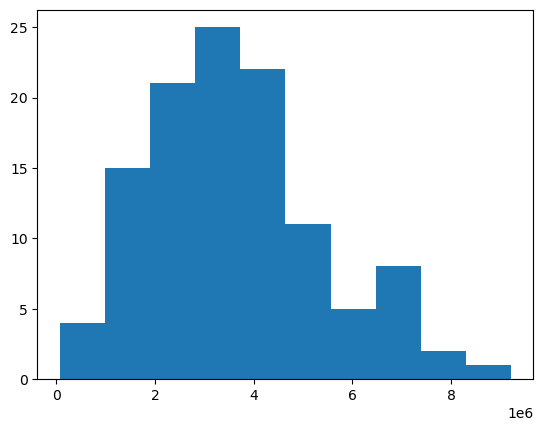

In [33]:
plt.hist(df['shape_area'])
df['shape_area'].describe()

In [17]:
filtro=[i for i in df.columns if f"tasa_{s_delito}" in i]
M=df.loc[:,filtro].max().max()

Text(0, 0.5, 'Estrato promedio')

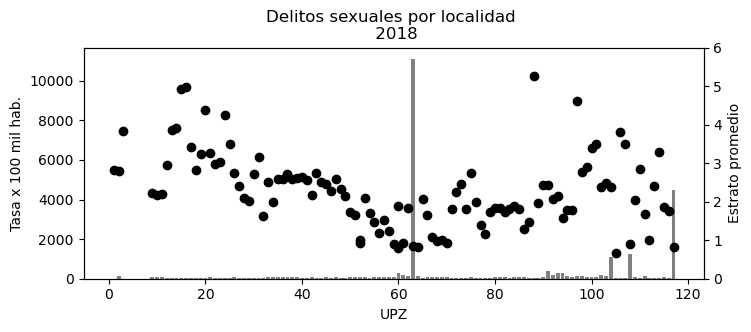

In [20]:
# Borrador para luego imputar a la función que crea el gráfico

df=df.sort_values(by='ESTRATO_mean')

fig, ax1 = plt.subplots(figsize=(8, 3))
ax2 = ax1.twinx()

ax1.set_title(f"{t_delito} por localidad \n {year}")

ax1.bar(x=df['CODIGO_UPZ'],height=df[f'tasa_{s_delito}_{year}'], color='grey')
# ax1.set_xticklabels(df['CODIGO_UPZ'], rotation=90)
ax1.set_ylabel('Tasa x 100 mil hab.')
ax1.set_xlabel('UPZ')
ax2.set_ylim([0,M])

# Plot social stratum
ax2.set_ylim([0,6])

ax2.scatter(x=df['CODIGO_UPZ'], y=df['ESTRATO_mean'], color='black')
# ax2.errorbar(x=df['CODIGO_UPZ'],y=df['ESTRATO_mean'], yerr=df['ESTRATO_stddev'],linestyle='', 
#              ecolor='#404040', elinewidth=.5)
ax2.set_ylabel('Estrato promedio')
# [ax2.text(i, j+.3, f'({np.float64(j).round(1)})', fontsize=9, ha='center') for (i, j) in zip(df['CODIGO_UPZ'], df['ESTRATO_mean'])]
# ax1.text(-1,-25, "Estrato promedio en paréntesis.", fontsize=8)

# 3-Homicidios

In [161]:
### Load necessary strings

n_delito = "3"
s_delito = "homicidios"
t_delito = "Homicidios"

In [11]:
# year=2018
# df[f'tasa_{s_delito}_{year}']=np.round(df[f'{s_delito}_{year}']/df[f'poblacion_loc_{year}']*100000,2)
# year=2019
# df[f'tasa_{s_delito}_{year}']=np.round(df[f'{s_delito}_{year}']/df[f'poblacion_loc_{year}']*100000,2)
# year=2020
# df[f'tasa_{s_delito}_{year}']=np.round(df[f'{s_delito}_{year}']/df[f'poblacion_loc_{year}']*100000,2)
# year=2021
# df[f'tasa_{s_delito}_{year}']=np.round(df[f'{s_delito}_{year}']/df[f'poblacion_loc_{year}']*100000,2)


/var/folders/gh/2cf49j_x4q533sfszrhs7szc0000gn/T/ipykernel_14056/978821508.py:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(df['LocNombre'], rotation=90)
/var/folders/gh/2cf49j_x4q533sfszrhs7szc0000gn/T/ipykernel_14056/978821508.py:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(df['LocNombre'], rotation=90)
/var/folders/gh/2cf49j_x4q533sfszrhs7szc0000gn/T/ipykernel_14056/978821508.py:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(df['LocNombre'], rotation=90)
/var/folders/gh/2cf49j_x4q533sfszrhs7szc0000gn/T/ipykernel_14056/978821508.py:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(df['LocNombre'], rotation=90)


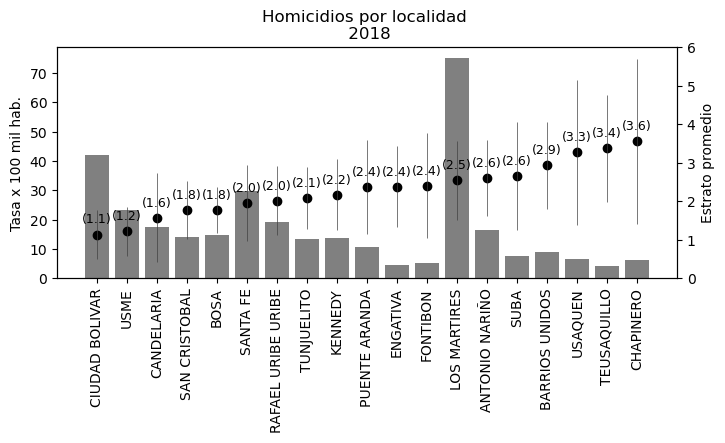

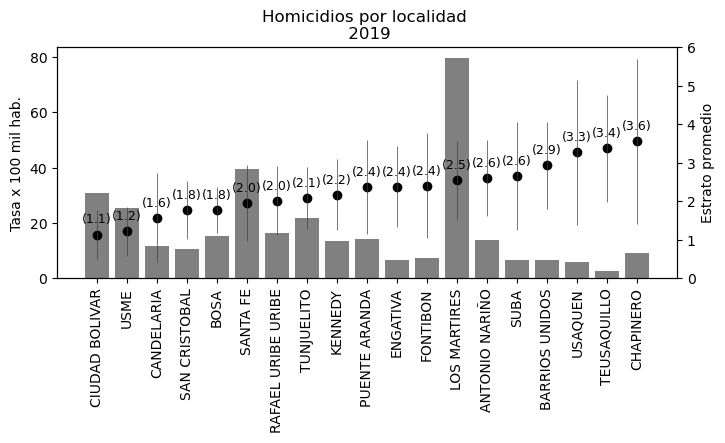

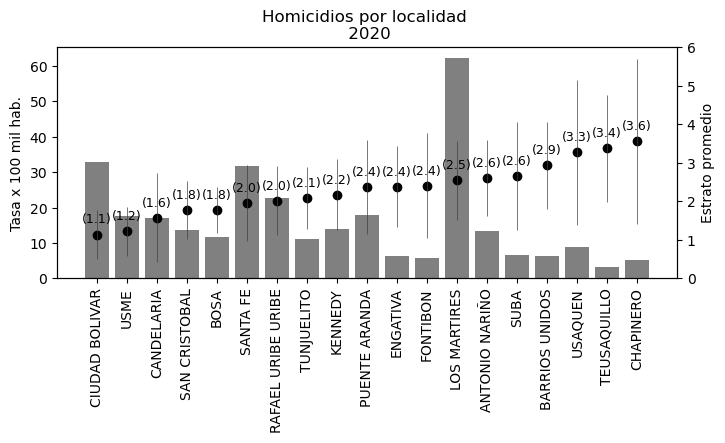

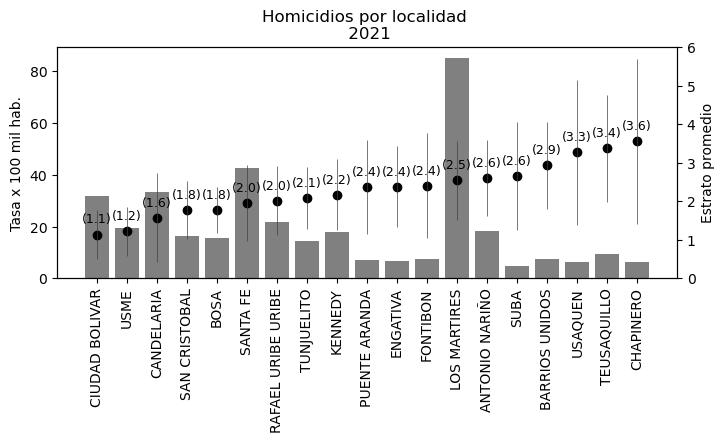

In [168]:
plot(df, t_delito=t_delito, s_delito=s_delito, year='2018');
plot(df, t_delito=t_delito, s_delito=s_delito, year='2019');
plot(df, t_delito=t_delito, s_delito=s_delito, year='2020');
plot(df, t_delito=t_delito, s_delito=s_delito, year='2021');

# 4-Violencia intrafamiliar

In [170]:
### Load necessary strings

n_delito = "4"
s_delito = "violencia_intrafamiliar"
t_delito = "Violencia intrafamiliar"

In [14]:
year=2018
df[f'tasa_{s_delito}_{year}']=np.round(df[f'{s_delito}_{year}']/df[f'poblacion_loc_{year}']*100000,2)

Index(['LocNombre', 'LocAAdmini', 'LocArea', 'LocCodigo', 'SHAPE_Leng',
       'SHAPE_Area', 'ESTRATO_mean', 'ESTRATO_median', 'ESTRATO_stddev',
       'poblacion_loc_2018', 'poblacion_loc_2019', 'poblacion_loc_2020',
       'poblacion_loc_2021', 'poblacion_loc_2022', 'delitos_sexuales_2018',
       'homicidios_2018', 'homicidios_2019', 'homicidios_2020',
       'homicidios_2021', 'violencia_intrafamiliar_2018',
       'hurto_a_personas_2018', 'hurto_a_personas_2019',
       'hurto_a_personas_2020', 'hurto_a_personas_2021',
       'hurto_a_residencias_2018', 'hurto_automotores_2018',
       'hurto_automotores_2019', 'hurto_automotores_2020',
       'hurto_automotores_2021', 'hurto_motocicletas_2018',
       'hurto_motocicletas_2019', 'hurto_motocicletas_2020',
       'hurto_motocicletas_2021', 'hurto_comercios_2018',
       'hurto_comercios_2019', 'hurto_comercios_2020', 'hurto_comercios_2021',
       'geometry', 'tasa_delitos_sexuales_2018', 'tasa_homicidios_2018',
       'tasa_homici

/var/folders/gh/2cf49j_x4q533sfszrhs7szc0000gn/T/ipykernel_14056/978821508.py:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(df['LocNombre'], rotation=90)


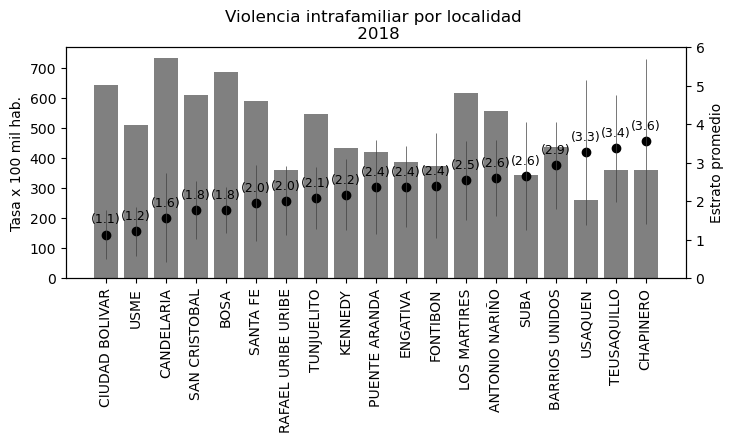

In [171]:
plot(df, t_delito=t_delito, s_delito=s_delito, year='2018');

# 6-Hurto a personas

In [172]:
### Load necessary strings

n_delito = "6"
s_delito = "hurto_a_personas"
t_delito = "Hurto a personas"

In [16]:
year=2018
df[f'tasa_{s_delito}_{year}']=np.round(df[f'{s_delito}_{year}']/df[f'poblacion_loc_{year}']*100000,2)
year=2019
df[f'tasa_{s_delito}_{year}']=np.round(df[f'{s_delito}_{year}']/df[f'poblacion_loc_{year}']*100000,2)
year=2020
df[f'tasa_{s_delito}_{year}']=np.round(df[f'{s_delito}_{year}']/df[f'poblacion_loc_{year}']*100000,2)
year=2021
df[f'tasa_{s_delito}_{year}']=np.round(df[f'{s_delito}_{year}']/df[f'poblacion_loc_{year}']*100000,2)


/var/folders/gh/2cf49j_x4q533sfszrhs7szc0000gn/T/ipykernel_14056/978821508.py:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(df['LocNombre'], rotation=90)
/var/folders/gh/2cf49j_x4q533sfszrhs7szc0000gn/T/ipykernel_14056/978821508.py:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(df['LocNombre'], rotation=90)
/var/folders/gh/2cf49j_x4q533sfszrhs7szc0000gn/T/ipykernel_14056/978821508.py:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(df['LocNombre'], rotation=90)
/var/folders/gh/2cf49j_x4q533sfszrhs7szc0000gn/T/ipykernel_14056/978821508.py:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(df['LocNombre'], rotation=90)


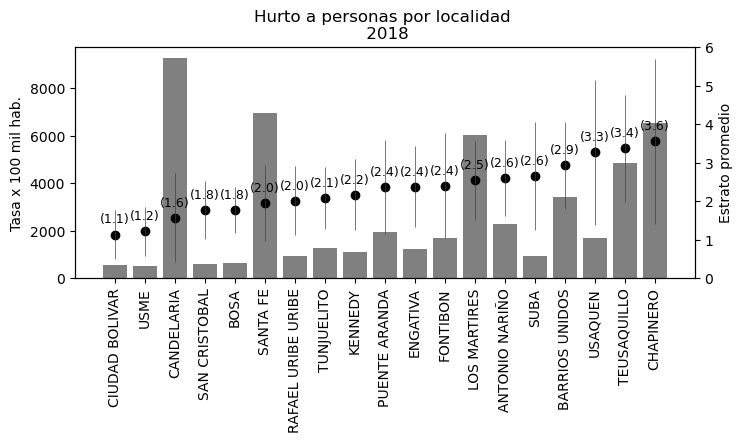

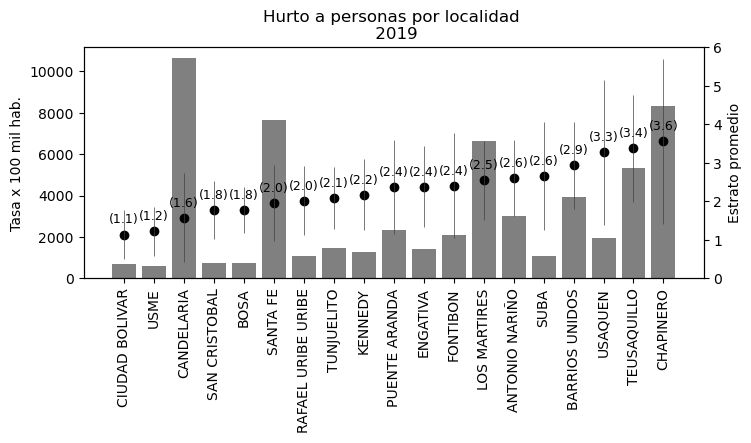

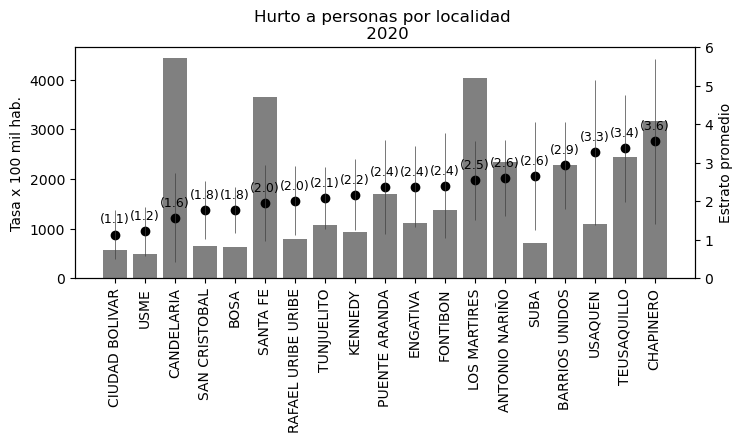

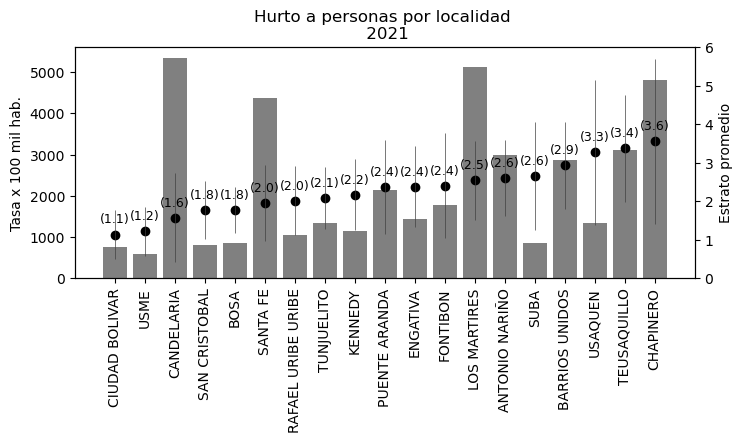

In [173]:
plot(df, t_delito=t_delito, s_delito=s_delito, year='2018');
plot(df, t_delito=t_delito, s_delito=s_delito, year='2019');
plot(df, t_delito=t_delito, s_delito=s_delito, year='2020');
plot(df, t_delito=t_delito, s_delito=s_delito, year='2021');

# 7-Hurto a residencias

In [174]:
### Load necessary strings

n_delito = "7"
s_delito = "hurto_a_residencias"
t_delito = "Hurto a residencias"

In [18]:
year=2018
df[f'tasa_{s_delito}_{year}']=np.round(df[f'{s_delito}_{year}']/df[f'poblacion_loc_{year}']*100000,2)

/var/folders/gh/2cf49j_x4q533sfszrhs7szc0000gn/T/ipykernel_14056/978821508.py:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(df['LocNombre'], rotation=90)


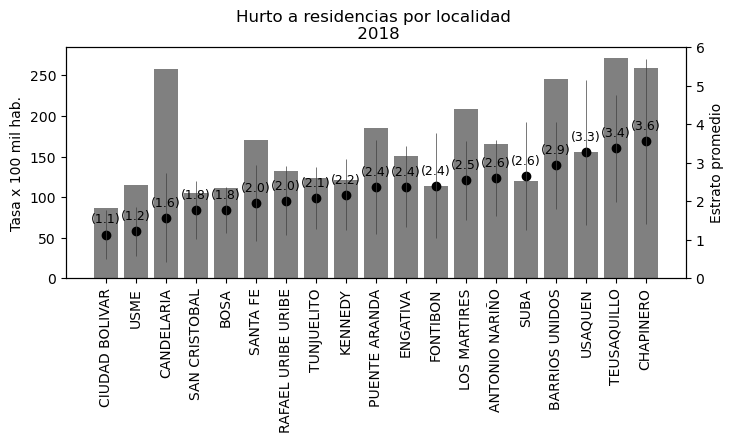

In [175]:
plot(df, t_delito=t_delito, s_delito=s_delito, year='2018');

# 8-Hurto de automotores

In [176]:
### Load necessary strings

n_delito = "8"
s_delito = "hurto_automotores"
t_delito = "Hurto de automotores"

In [20]:
year=2018
df[f'tasa_{s_delito}_{year}']=np.round(df[f'{s_delito}_{year}']/df[f'poblacion_loc_{year}']*100000,2)
year=2019
df[f'tasa_{s_delito}_{year}']=np.round(df[f'{s_delito}_{year}']/df[f'poblacion_loc_{year}']*100000,2)
year=2020
df[f'tasa_{s_delito}_{year}']=np.round(df[f'{s_delito}_{year}']/df[f'poblacion_loc_{year}']*100000,2)
year=2021
df[f'tasa_{s_delito}_{year}']=np.round(df[f'{s_delito}_{year}']/df[f'poblacion_loc_{year}']*100000,2)


/var/folders/gh/2cf49j_x4q533sfszrhs7szc0000gn/T/ipykernel_14056/978821508.py:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(df['LocNombre'], rotation=90)
/var/folders/gh/2cf49j_x4q533sfszrhs7szc0000gn/T/ipykernel_14056/978821508.py:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(df['LocNombre'], rotation=90)
/var/folders/gh/2cf49j_x4q533sfszrhs7szc0000gn/T/ipykernel_14056/978821508.py:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(df['LocNombre'], rotation=90)
/var/folders/gh/2cf49j_x4q533sfszrhs7szc0000gn/T/ipykernel_14056/978821508.py:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(df['LocNombre'], rotation=90)


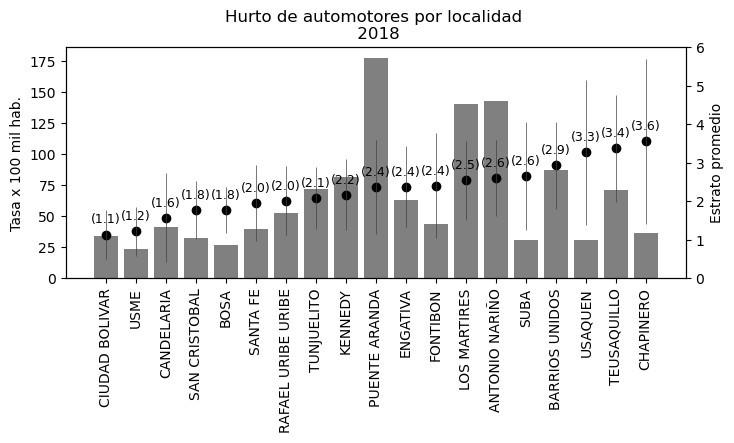

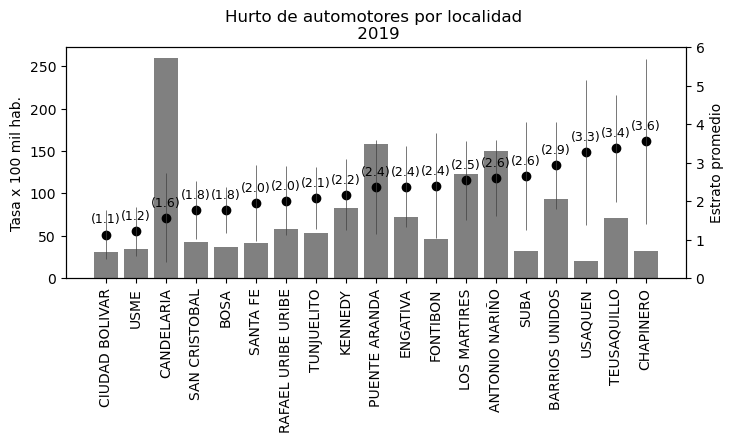

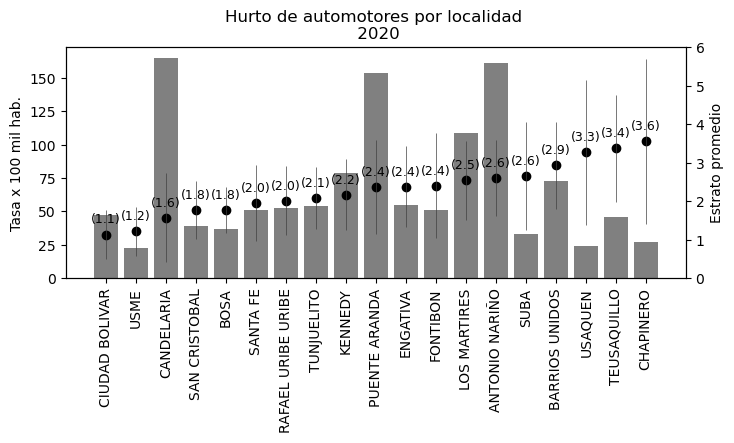

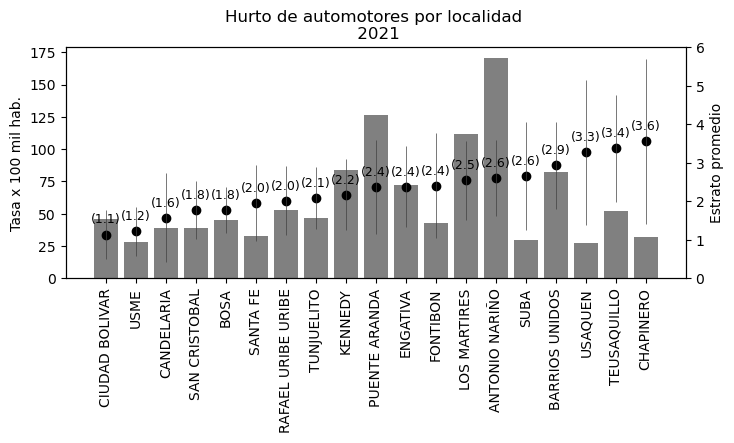

In [177]:
plot(df, t_delito=t_delito, s_delito=s_delito, year='2018');
plot(df, t_delito=t_delito, s_delito=s_delito, year='2019');
plot(df, t_delito=t_delito, s_delito=s_delito, year='2020');
plot(df, t_delito=t_delito, s_delito=s_delito, year='2021');

# 9-Hurto de motocicletas

In [178]:
### Load necessary strings

n_delito = "9"
s_delito = "hurto_motocicletas"
t_delito = "Hurto de motocicletas"

In [22]:
year=2018
df[f'tasa_{s_delito}_{year}']=np.round(df[f'{s_delito}_{year}']/df[f'poblacion_loc_{year}']*100000,2)
year=2019
df[f'tasa_{s_delito}_{year}']=np.round(df[f'{s_delito}_{year}']/df[f'poblacion_loc_{year}']*100000,2)
year=2020
df[f'tasa_{s_delito}_{year}']=np.round(df[f'{s_delito}_{year}']/df[f'poblacion_loc_{year}']*100000,2)
year=2021
df[f'tasa_{s_delito}_{year}']=np.round(df[f'{s_delito}_{year}']/df[f'poblacion_loc_{year}']*100000,2)


/var/folders/gh/2cf49j_x4q533sfszrhs7szc0000gn/T/ipykernel_14056/978821508.py:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(df['LocNombre'], rotation=90)
/var/folders/gh/2cf49j_x4q533sfszrhs7szc0000gn/T/ipykernel_14056/978821508.py:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(df['LocNombre'], rotation=90)
/var/folders/gh/2cf49j_x4q533sfszrhs7szc0000gn/T/ipykernel_14056/978821508.py:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(df['LocNombre'], rotation=90)
/var/folders/gh/2cf49j_x4q533sfszrhs7szc0000gn/T/ipykernel_14056/978821508.py:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(df['LocNombre'], rotation=90)


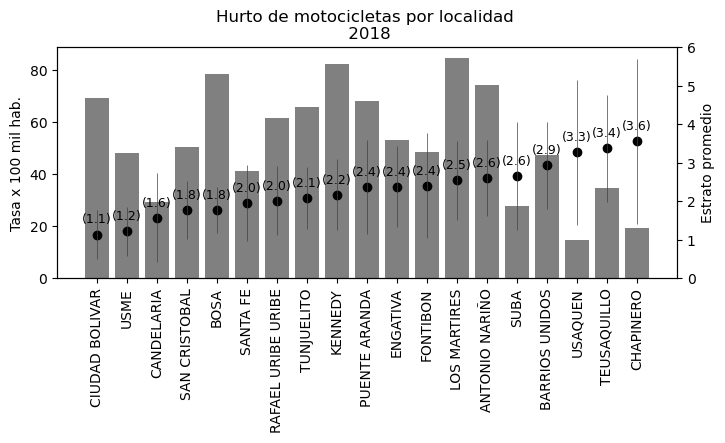

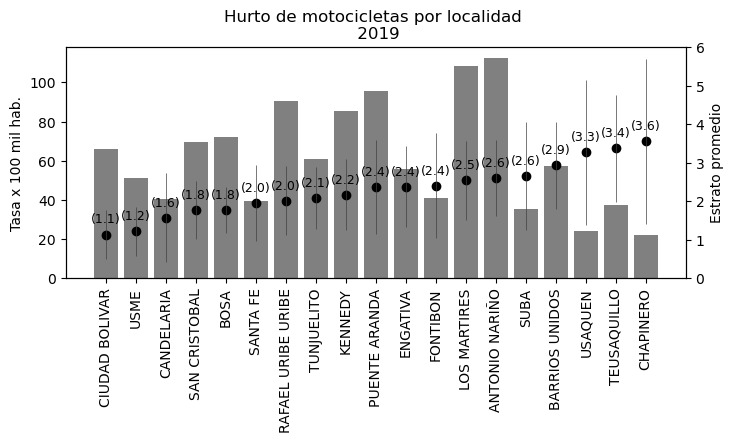

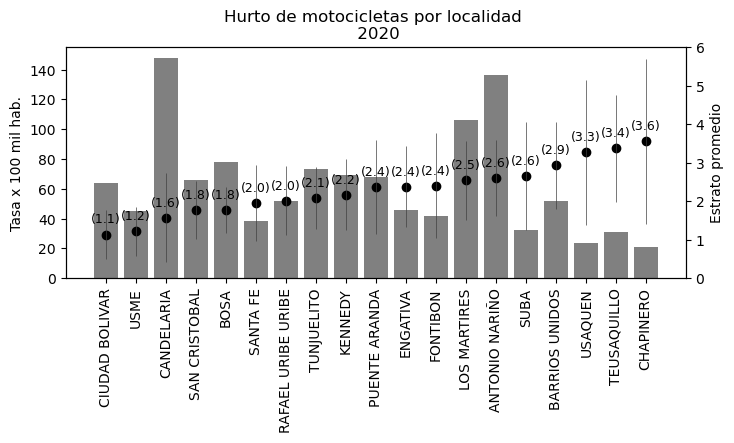

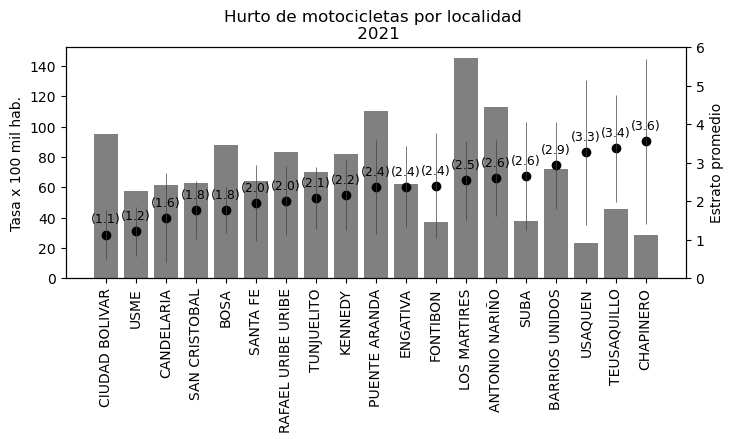

In [179]:
plot(df, t_delito=t_delito, s_delito=s_delito, year='2018');
plot(df, t_delito=t_delito, s_delito=s_delito, year='2019');
plot(df, t_delito=t_delito, s_delito=s_delito, year='2020');
plot(df, t_delito=t_delito, s_delito=s_delito, year='2021');

# 10-Hurto a comercios

In [180]:
### Load necessary strings

n_delito = "10"
s_delito = "hurto_comercios"
t_delito = "Hurto a comercios"

In [24]:
year=2018
df[f'tasa_{s_delito}_{year}']=np.round(df[f'{s_delito}_{year}']/df[f'poblacion_loc_{year}']*100000,2)
year=2019
df[f'tasa_{s_delito}_{year}']=np.round(df[f'{s_delito}_{year}']/df[f'poblacion_loc_{year}']*100000,2)
year=2020
df[f'tasa_{s_delito}_{year}']=np.round(df[f'{s_delito}_{year}']/df[f'poblacion_loc_{year}']*100000,2)
year=2021
df[f'tasa_{s_delito}_{year}']=np.round(df[f'{s_delito}_{year}']/df[f'poblacion_loc_{year}']*100000,2)


/var/folders/gh/2cf49j_x4q533sfszrhs7szc0000gn/T/ipykernel_14056/978821508.py:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(df['LocNombre'], rotation=90)
/var/folders/gh/2cf49j_x4q533sfszrhs7szc0000gn/T/ipykernel_14056/978821508.py:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(df['LocNombre'], rotation=90)
/var/folders/gh/2cf49j_x4q533sfszrhs7szc0000gn/T/ipykernel_14056/978821508.py:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(df['LocNombre'], rotation=90)
/var/folders/gh/2cf49j_x4q533sfszrhs7szc0000gn/T/ipykernel_14056/978821508.py:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(df['LocNombre'], rotation=90)


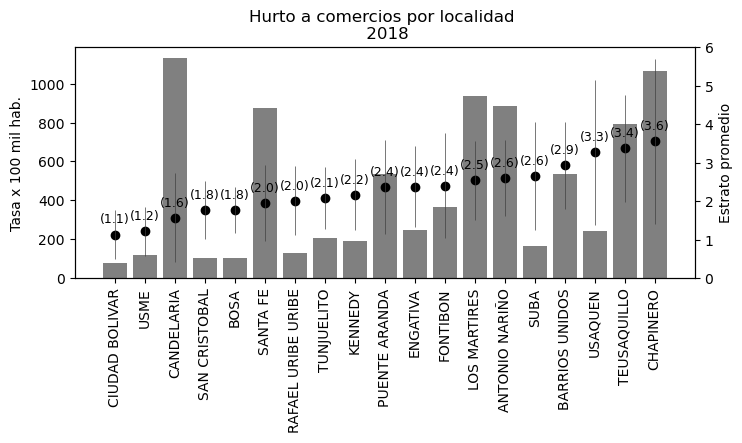

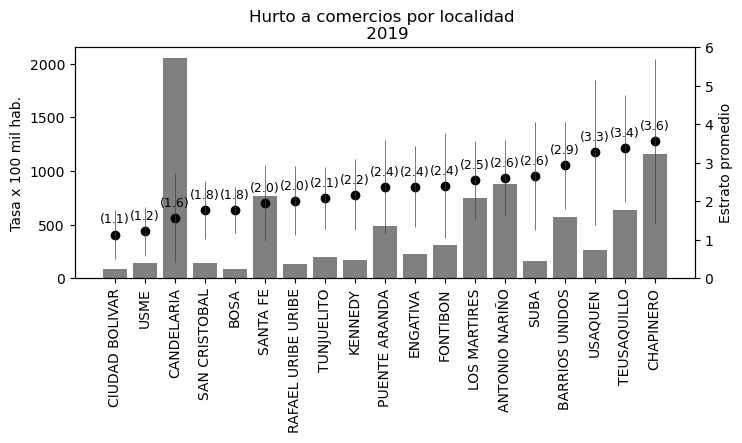

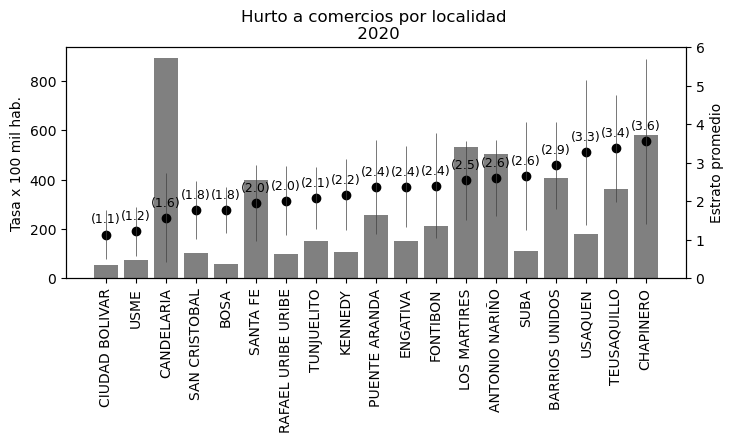

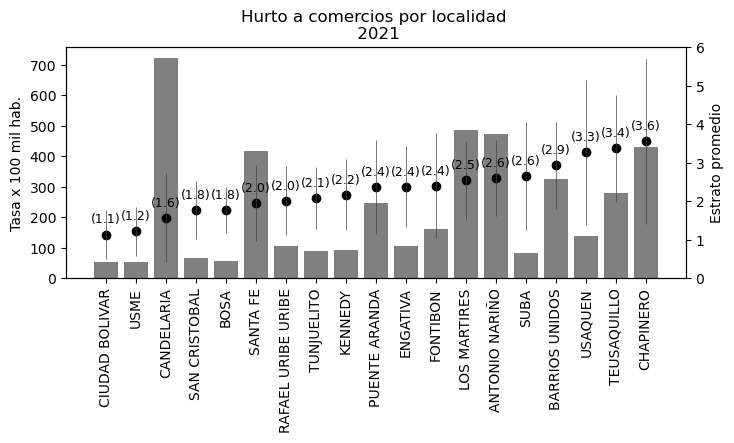

In [181]:
plot(df, t_delito=t_delito, s_delito=s_delito, year='2018');
plot(df, t_delito=t_delito, s_delito=s_delito, year='2019');
plot(df, t_delito=t_delito, s_delito=s_delito, year='2020');
plot(df, t_delito=t_delito, s_delito=s_delito, year='2021');